# ARIMA - Auto Regressive Integrated Moving Average

It can't accurately predict all types of time series data. For example stock is not really just a function of time, it has other factors.

ARIMA really performs well when thre data is directly related to the timestamp such as airline passengers data.

SARIMA - Seasonal ARIMA, SARIMAX - SARIMA with exogenous(external factors) variables.

ARIMA is sometimes applied to non-stationary data after applying a differencing step of 1 or more order which represents the integrated component.

ARIMA(p,d,q)  - 

AR(p) - A regression model that utilizes the dependent relationship between a current observation and observations over a previous period.

I(d) - Integrated - Shifting or differencing needed to make the dataset stationary

MA(q) - A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

Stationary - A stationary series has constant mean and variance over time. Variance should not be a function of time. Auto-covariance should not be a function of time.

Augmented Dicky Fuller Test is a common mathematical test used to determine stationarity in our data.

Differencing - Downshift by 1 and subtract from original to get first difference. Do the same with the first difference to get second difference. Each differenced data will have one less observation then the previous one(We lose a row of data). Since the first observation won't have previous day date to subtract.

For seasonal data, you can difference by a season length. Example for monthly data with yearly seasonality, we can difference by 12 instead of 1. Also, we can combine first difference with difference by 12.

Methods to determine p,q,d:

1. using ACF and PCF - Based on viewing the decay in the plot. This is difficult to read the plots and even if we read them correctly, the best performing p,d,q will be different.
2. Grid Search - Easy but takes time. Run ARIMA for different combinations for p,d,q terms and evaluate to find the best. Use automated tools.

SARIMA(p,d,q,P,D,Q)

AR Model - In an autoregression model, we forecast using a linear combination of past values of the variable.

### It specifies that the output variable depends linearly on its own previous values and on a stochastic term (an imperfectly predictable term or random noise)

ARIMA, SARIMA, VAR(Vector AR) have more complicated stochastic structures. l- lag coefficients.

y_t = c + l1 * y_t-1 + l2 * y_t-2 +...+e_t.

lag coefficient up to order p. No of lags to consider. c is constant. e_t - white noise.

AR(1) y_t = c + w * y_t-1 + e_t

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
from statsmodels.tsa.ar_model import AR, ARResults

Import US population data

In [3]:
df = pd.read_csv('Data/uspopulation.csv',index_col='DATE', parse_dates=True)

In [4]:
df.index.freq='MS'

In [5]:
df.head(5)

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


<AxesSubplot:xlabel='DATE'>

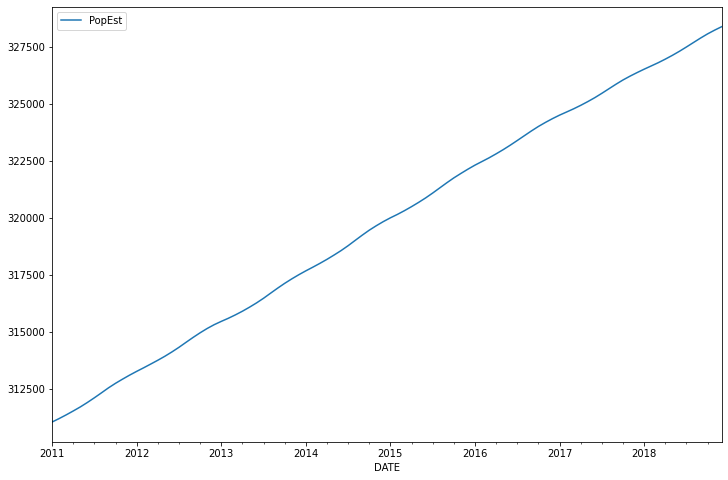

In [7]:
df.plot(figsize=(12,8))

Pretty linear data

# Split to train and test

In [8]:
df.shape

(96, 1)

In [9]:
train = df.iloc[:84]
test = df.iloc[84:]

In [11]:
import warnings
warnings.filterwarnings('ignore')

Simple AR model

In [12]:
model = AR(train['PopEst'])

Main parameter is maxlag which is the order p. Others include method, information criterion, solver, trend.

In [13]:
AR1_fitted = model.fit(maxlag=1) 

In [15]:
AR1_fitted.params

const        284.913797
L1.PopEst      0.999686
dtype: float64

Shows the constant and coeffient value

In [16]:
start = len(train) #84
end = len(train) + len(test) - 1 #95 since 96 is 0-95

In [17]:
AR1_fitted.predict(start=start,end=end)

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, dtype: float64

In [18]:
test

,PopEst
DATE,
2018-01-01,326527
2018-02-01,326669
2018-03-01,326812
2018-04-01,326968
2018-05-01,327134
2018-06-01,327312
2018-07-01,327502
2018-08-01,327698
2018-09-01,327893


Holt-Winter had forecast method here we have predict method. Both same functionality.

In [19]:
predictions1 = AR1_fitted.predict(start=start,end=end)

In [21]:
predictions1 = predictions1.rename('AR(1) Predictions')

In [22]:
predictions1

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, Name: AR(1) Predictions, dtype: float64

<AxesSubplot:xlabel='DATE'>

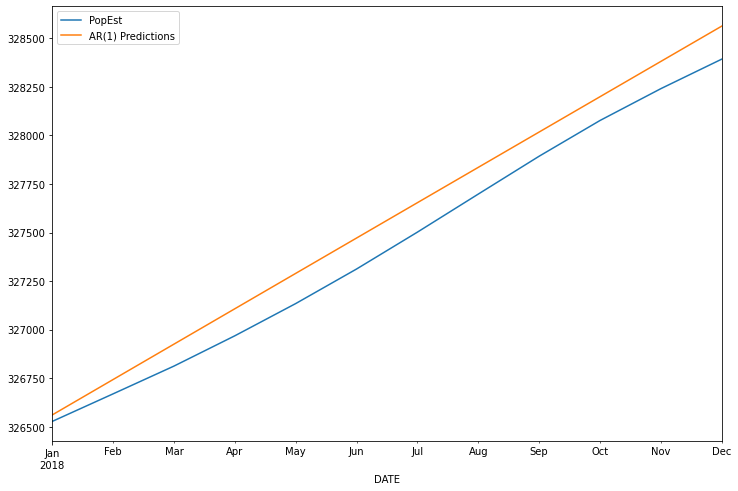

In [24]:
test.plot(figsize=(12,8), legend=True)
predictions1.plot(legend=True)

In [41]:
AR2_fit = AR(train['PopEst']).fit(maxlag=2)

In [42]:
AR2_fit.params

const        137.368305
L1.PopEst      1.853490
L2.PopEst     -0.853836
dtype: float64

In [43]:
predictions2 = AR2_fit.predict(start=start,end=end)

In [44]:
predictions2 = predictions2.rename('AR2 Predictions')

<AxesSubplot:xlabel='DATE'>

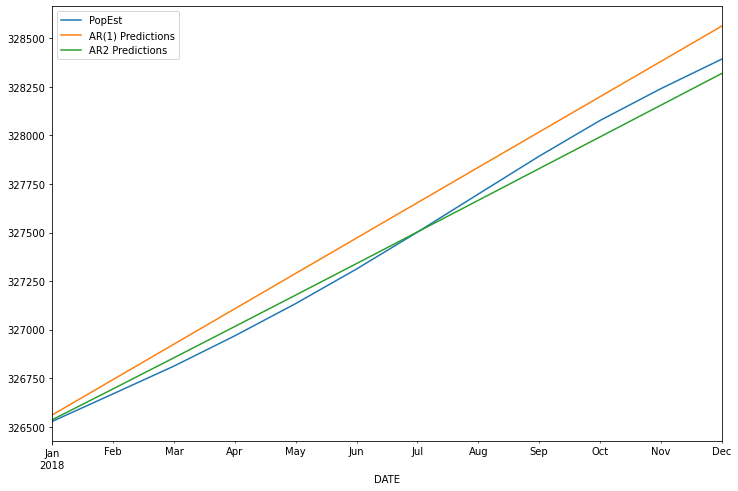

In [45]:
test.plot(figsize=(12,8), legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)

If you don't specify maxlag then statsmodel experiments and chooses the best.

Just play with information criterion. Mostly Akaike IC aic is used. ARIMA by default use AIC. Here we have control to change

In [46]:
ARfit = AR(train['PopEst']).fit(ic='t-stat')

In [47]:
ARfit.params

const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64

In [48]:
predictions8 = ARfit.predict(start,end)
predictions8 = predictions8.rename('AR(8) Predictions')

In [49]:
from sklearn.metrics import mean_squared_error

In [50]:
labels = ['AR1','AR2','AR8']

In [51]:
preds = [predictions1,predictions2,predictions8]

In [52]:
for i in range(3):
    error = mean_squared_error(test['PopEst'] , preds[i])
    print(f"{labels[i]} MSE was :{error}")

AR1 MSE was :17449.714236623775
AR2 MSE was :2713.258528140898
AR8 MSE was :186.97365867982003


<AxesSubplot:xlabel='DATE'>

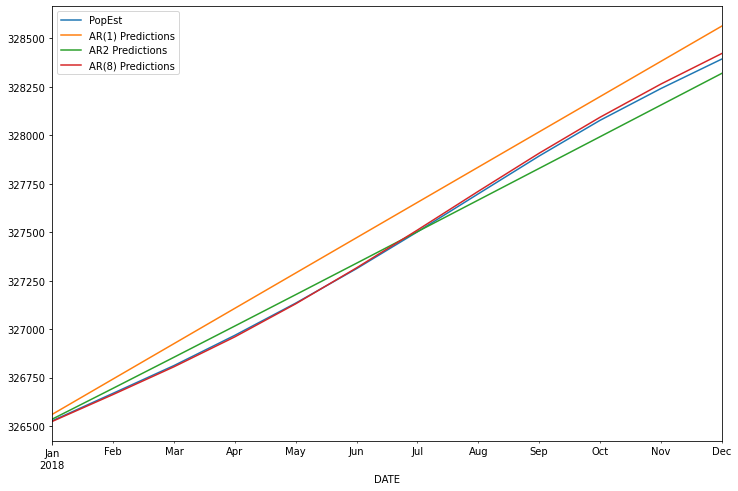

In [53]:
test.plot(figsize=(12,8), legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions8.plot(legend=True)

Retrain on full dataset and forecast in to future

In [56]:
AR_final = AR(df['PopEst']).fit()

forecaseted_values = AR_final.predict(start=96,end=108).rename('Forecast') #Our test set was 12 months so don't forecast too much in to future. 
#You don't have info on how good would those results be.

<AxesSubplot:xlabel='DATE'>

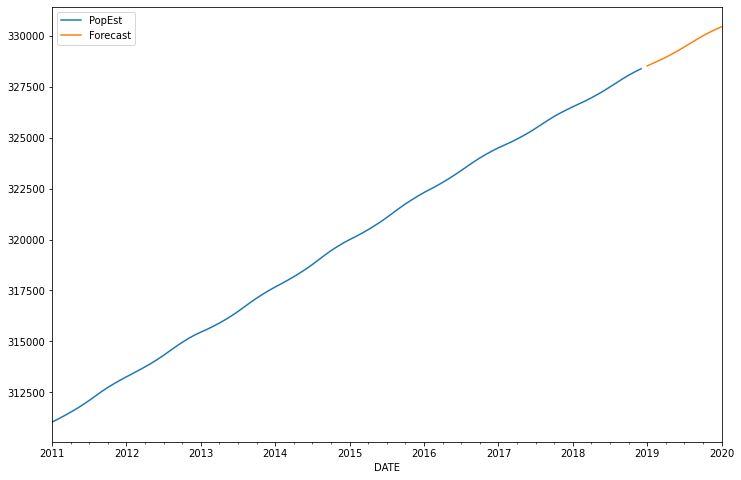

In [57]:
df['PopEst'].plot(figsize=(12,8), legend=True)
forecaseted_values.plot(legend=True)